In [1]:
# data input
baseball = read.csv("baseball.csv")
weather = read.csv("weather.csv")
baseball<- merge(baseball, weather,by.x = 'event_date',by.y = 'date')

baseball$event_date = as.Date (baseball$event_date, "%Y-%m-%d")
baseball$weekday = weekdays(baseball$event_date)
baseball$event_time = as.numeric(substr(baseball$event_time,1,2))

baseball$timeofday <- ifelse(baseball$event_time<19,
                             c("Afternoon"),c("Evening"))


In [2]:
# test 1 tickets
mod1=lm(attendance~tickets_sold+tickets_resale, data=subset(baseball, season <= 2014))
pr1<-predict(mod1,newdata = subset(baseball, season > 2014))
mspe1<-mean((pr1-subset(baseball, season > 2014)$attendance)^2)

summary(mod1)
mspe1


Call:
lm(formula = attendance ~ tickets_sold + tickets_resale, data = subset(baseball, 
    season <= 2014))

Residuals:
   Min     1Q Median     3Q    Max 
-11352  -1034    372   1546   4907 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.559e+03  4.876e+02  -9.350  < 2e-16 ***
tickets_sold    8.665e-01  2.119e-02  40.898  < 2e-16 ***
tickets_resale  5.234e-01  9.415e-02   5.559 5.71e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2141 on 321 degrees of freedom
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9474 
F-statistic:  2910 on 2 and 321 DF,  p-value: < 2.2e-16


[1] 4153844

In [3]:
# test 2 time
mod2=lm(attendance~timeofday+weekday, data=subset(baseball, season <= 2014))
pr2<-predict(mod2,newdata = subset(baseball, season > 2014))
mspe2<-mean((pr2-subset(baseball, season > 2014)$attendance)^2)

summary(mod2)
mspe2


Call:
lm(formula = attendance ~ timeofday + weekday, data = subset(baseball, 
    season <= 2014))

Residuals:
   Min     1Q Median     3Q    Max 
-22399  -4738   -867   3481  28148 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       31084.5     1548.6  20.073  < 2e-16 ***
timeofdayEvening    107.3     1168.5   0.092  0.92689    
weekdayMonday    -11731.3     1566.5  -7.489 6.99e-13 ***
weekdaySaturday    1717.0     1502.0   1.143  0.25384    
weekdaySunday     -4823.7     1744.5  -2.765  0.00602 ** 
weekdayThursday  -11021.9     1673.5  -6.586 1.89e-10 ***
weekdayTuesday   -12566.9     1452.3  -8.653 2.59e-16 ***
weekdayWednesday -12746.9     1486.8  -8.573 4.56e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7328 on 316 degrees of freedom
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.3838 
F-statistic: 29.74 on 7 and 316 DF,  p-value: < 2.2e-16


[1] 81925237

In [5]:
# test 3 weather & temp
mod3=lm(attendance~weather+mean_temp, data=subset(baseball, season <= 2014))
pr3<-predict(mod3,newdata =subset(baseball, season > 2014))
mspe3<-mean((pr3-subset(baseball, season > 2014)$attendance)^2)

summary(mod3)
mspe3



Call:
lm(formula = attendance ~ weather + mean_temp, data = subset(baseball, 
    season <= 2014))

Residuals:
     Min       1Q   Median       3Q      Max 
-20096.5  -7584.7   -638.9   6570.1  23939.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25106.47    4484.13   5.599 4.64e-08 ***
weatherRain  -2398.99    3413.27  -0.703    0.483    
weatherSunny -1939.34    3384.07  -0.573    0.567    
mean_temp       53.37     127.94   0.417    0.677    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9368 on 320 degrees of freedom
Multiple R-squared:  0.002364,	Adjusted R-squared:  -0.006989 
F-statistic: 0.2527 on 3 and 320 DF,  p-value: 0.8594


[1] 112650351

In [6]:
# test 4 win_pcnt
mod4=lm(attendance~opponent_win_pcnt+braves_win_pcnt, data=subset(baseball, season <= 2014))
pr4<-predict(mod4,newdata = subset(baseball, season > 2014))
mspe4<-mean((pr4-subset(baseball, season > 2014)$attendance)^2)

summary(mod4)
mspe4



Call:
lm(formula = attendance ~ opponent_win_pcnt + braves_win_pcnt, 
    data = subset(baseball, season <= 2014))

Residuals:
     Min       1Q   Median       3Q      Max 
-20207.5  -7744.5   -182.7   6433.2  24102.9 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10081      18013   0.560 0.576101    
opponent_win_pcnt    27727       7505   3.694 0.000259 ***
braves_win_pcnt       1034      30395   0.034 0.972885    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9171 on 321 degrees of freedom
Multiple R-squared:  0.04094,	Adjusted R-squared:  0.03497 
F-statistic: 6.852 on 2 and 321 DF,  p-value: 0.001219


[1] 113622446

In [7]:
# 5 general model
mod5=lm(attendance~tickets_sold+tickets_resale+weekday+weather+mean_temp+opponent_win_pcnt, data=subset(baseball, season <= 2014))
pr5<-predict(mod5,newdata = subset(baseball, season > 2014))
mspe5<-mean((pr5-subset(baseball, season > 2014)$attendance)^2)

summary(mod5)
mspe5



Call:
lm(formula = attendance ~ tickets_sold + tickets_resale + weekday + 
    weather + mean_temp + opponent_win_pcnt, data = subset(baseball, 
    season <= 2014))

Residuals:
     Min       1Q   Median       3Q      Max 
-10819.7   -960.9    296.4   1347.0   4235.0 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.001e+02  1.432e+03   0.140   0.8889    
tickets_sold       8.436e-01  2.265e-02  37.247  < 2e-16 ***
tickets_resale     5.375e-01  9.421e-02   5.706  2.7e-08 ***
weekdayMonday     -1.176e+03  4.733e+02  -2.485   0.0135 *  
weekdaySaturday   -2.799e+02  4.094e+02  -0.684   0.4947    
weekdaySunday     -6.385e+02  4.188e+02  -1.524   0.1284    
weekdayThursday   -1.144e+03  4.965e+02  -2.305   0.0218 *  
weekdayTuesday    -1.087e+03  4.516e+02  -2.407   0.0167 *  
weekdayWednesday  -9.023e+02  4.559e+02  -1.979   0.0487 *  
weatherRain       -1.770e+03  7.574e+02  -2.337   0.0201 *  
weatherSunny      -7.725e+02  7.530e+02  -1

[1] 4510149

In [8]:
# 6 final model
mod6=lm(attendance~tickets_sold+tickets_resale+mean_temp+weather+opponent_win_pcnt, data=subset(baseball, season <= 2014))
pr6<-predict(mod6,newdata =subset(baseball, season > 2014))
mspe6<-mean((pr6-subset(baseball, season > 2014)$attendance)^2)

summary(mod6)
mspe6


Call:
lm(formula = attendance ~ tickets_sold + tickets_resale + mean_temp + 
    weather + opponent_win_pcnt, data = subset(baseball, season <= 
    2014))

Residuals:
     Min       1Q   Median       3Q      Max 
-10581.5   -961.7    343.5   1424.4   4315.4 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.038e+03  1.364e+03  -0.761   0.4474    
tickets_sold       8.664e-01  2.058e-02  42.099  < 2e-16 ***
tickets_resale     5.568e-01  9.166e-02   6.075 3.56e-09 ***
mean_temp         -5.079e+01  2.846e+01  -1.785   0.0753 .  
weatherRain       -1.759e+03  7.561e+02  -2.327   0.0206 *  
weatherSunny      -7.185e+02  7.507e+02  -0.957   0.3393    
opponent_win_pcnt -2.577e+03  1.756e+03  -1.468   0.1432    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2074 on 317 degrees of freedom
Multiple R-squared:  0.9516,	Adjusted R-squared:  0.9507 
F-statistic:  1038 on 6 and 317 DF,  p-value: < 2.2e-1

[1] 4249833

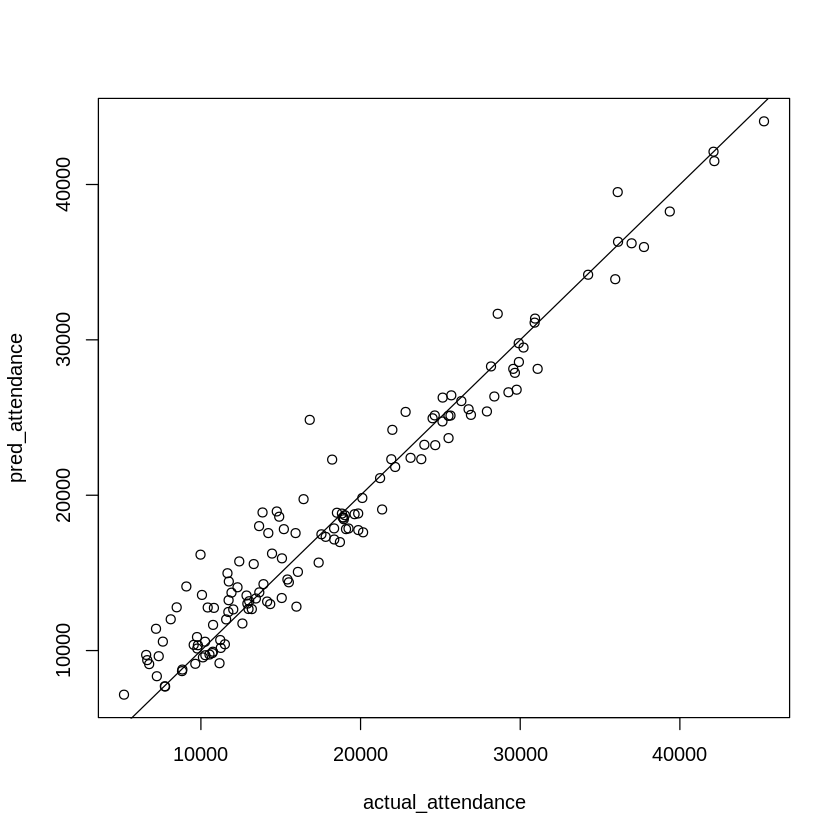

In [9]:
## math formula

pred_attendance=predict(mod6,newdata = subset(baseball, season > 2014))
actual_attendance=subset(baseball, season > 2014)$attendance

plot(actual_attendance, pred_attendance)
abline(0,1)



In [10]:
##StepWise
library(MASS)
#splitting trainning and testing dataset
dat.tr<-subset(baseball,event_date>="2011-01-01"& event_date<="2014-12-31",select = -c(event_time,event_id,event_date,season))
dat.te<-subset(baseball,event_date>="2015-01-01",select = -c(event_time,event_id,event_date,season))
null<-lm(attendance~1,data = dat.tr)
full<-lm(attendance~.,data = dat.tr)
set.seed(123)
st <- stepAIC(null, scope=list(lower=null, upper=full), trace=FALSE)
pr_aic<-predict(st,newdata = dat.te)
mspe_aic<-mean((pr_aic-dat.te$attendance)^2)

coef(st)
mspe_aic

(Intercept)      tickets_sold    tickets_resale       weatherRain 
    -1037.7701851         0.8663853         0.5568018     -1759.1322112 
     weatherSunny         mean_temp opponent_win_pcnt 
     -718.5226237       -50.7854945     -2577.1384184

[1] 4249833

In [15]:
##Since there exist some extent of correlation between independent variable (like oppo_rank and oppo_win_pect), Using Lasso for variable selection would be appropriate
##details in https://cran.r-project.org/web/packages/glmnet/glmnet.pdf

#duplicate orginal data
lasso.dat<-baseball
#Factoriaze character data
lasso.dat$timeofday<-as.factor(lasso.dat$timeofday)
lasso.dat$weekday<-as.factor(lasso.dat$weekday)
#create dummy variables for catogorical variables
for(level in unique(lasso.dat$timeofday)){
  lasso.dat[paste("dummy", level, sep = "_")] <- ifelse(lasso.dat$timeofday == level, 1, 0)
}
for(level in unique(lasso.dat$weekday)){
  lasso.dat[paste("dummy", level, sep = "_")] <- ifelse(lasso.dat$weekday == level, 1, 0)
}
for(level in unique(lasso.dat$weather)){
  lasso.dat[paste("dummy", level, sep = "_")] <- ifelse(lasso.dat$weather == level, 1, 0)
}
#Create trainning and testing dataset
dat.tr<-subset(lasso.dat,event_date>="2011-01-01"& event_date<="2014-12-31",select = -c(event_time,event_id,event_date,season,opponent,timeofday,weekday,weather))
dat.te<-subset(lasso.dat,event_date>="2015-01-01",select = -c(event_time,event_id,event_date,season,opponent,timeofday,weekday,weather))
#trainning lasso model
install.packages('glmnet')
library(glmnet)
xm<-as.matrix(dat.tr[,-2])
y<-as.vector(dat.tr[,2])
xte<-as.matrix(dat.te[,-2])
yte<-as.vector(dat.te[,2])
set.seed(1234)
tmp_las<-cv.glmnet(x=xm,y=y,nfolds = 5,alpha=1,family='gaussian',intercept=TRUE)
pr_las<-predict(tmp_las,s='lambda.min',newx = xte)
mspe_las<-mean((pr_las-yte)^2)

Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [16]:
coef(tmp_las, s=tmp_las$lambda.min)
mspe_las

23 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)       -3531.5751923
win                  31.3616523
tickets_sold          0.8497911
tickets_resale        0.4851607
opponent_payroll      .        
opponent_rank         .        
opponent_win_pcnt     .        
braves_payroll        .        
braves_rank           .        
braves_win_pcnt       .        
mean_temp           -10.0274554
dummy_Evening         .        
dummy_Afternoon       .        
dummy_Friday        514.5859031
dummy_Saturday      266.8608141
dummy_Sunday          .        
dummy_Tuesday         .        
dummy_Wednesday       .        
dummy_Thursday        .        
dummy_Monday         -3.5190358
dummy_Sunny           .        
dummy_Rain         -723.9546115
dummy_Foggy         115.1437471

[1] 4364045

In [ ]:
#The result is similar to the model we get using stepwise with slighly larger mspe
#we can see that the attendace in Friday and Saturday are higher than attendance in other days
#But considering the predicitng power, we will not include 'weekday' attribute in our final model